Forma de la imagen preprocesada: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicción: Santiago con una confianza de 100.00%


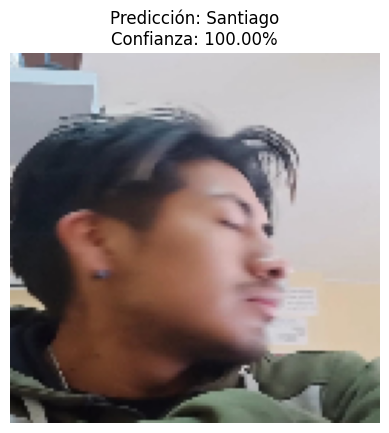

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Cargar el modelo
model = tf.keras.models.load_model('redes_entrenadas/ReconocimientoFacial.h5')

# Directorio de las imágenes
image_dir = 'C:/Users/User/Desktop/TALLER3/dataset/propias/'

# Crear un diccionario que mapea la clase 0 a "Desconocido"
class_to_name = {0: 'Desconocido'}

# Agregar las demás clases automáticamente
for idx, folder_name in enumerate(os.listdir(image_dir), start=1):
    if os.path.isdir(os.path.join(image_dir, folder_name)):
        user_name = folder_name.split('_')[1]  # Obtener el nombre del usuario
        class_to_name[idx] = user_name

# Ruta de la imagen a predecir
image_path = 'C:/Users/User/Desktop/TALLER3/dataset/propias/002_Santiago/face_0030.jpg'

# Cargar y preprocesar la imagen
img = image.load_img(image_path, target_size=(128, 128))  # Ajusta el tamaño según tu modelo
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar si es necesario

# Verificar la forma de la imagen
print(f"Forma de la imagen preprocesada: {img_array.shape}")

# Hacer la predicción
prediccion = model.predict(img_array)
predicted_class = np.argmax(prediccion, axis=1)[0]
confidence = np.max(prediccion) * 100

# Obtener el nombre del usuario a partir de la predicción
user_name = class_to_name.get(predicted_class, "Desconocido")

print(f"Predicción: {user_name} con una confianza de {confidence:.2f}%")

# Mostrar la imagen
plt.imshow(img)
plt.title(f"Predicción: {user_name}\nConfianza: {confidence:.2f}%")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step

c:\Users\User\Desktop\TALLER3\.venv\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 48, 48, 1))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted class: surprise, Confidence: 39.64%


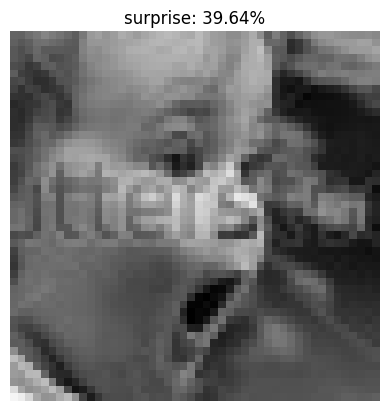

In [1]:
from tensorflow.keras.models import load_model
import cv2 
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

faces = []
class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Cargamos una imagen del directorio
imaget_path = "C:/Users/User/Desktop/TALLER3/dataset/FER/test/surprise/PrivateTest_1076980.jpg"

# Redimensionamos la imagen y convertimos a gray
face = cv2.cvtColor(cv2.imread(imaget_path), cv2.COLOR_BGR2GRAY)
face = cv2.resize(face, (48, 48))
face2 = img_to_array(face)
face2 = np.expand_dims(face2, axis=0)

faces.append(face2)
model = load_model('redes_entrenadas/reconocimiento_emociones.h5')
# El modelo estima la predicción
preds = model.predict(faces)

predicted_class = class_names[np.argmax(preds)]
confidence = np.max(preds) * 100

print(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}%")

# Mostrar la imagen con el label y el porcentaje
plt.imshow(cv2.cvtColor(np.asarray(face), cv2.COLOR_BGR2RGB))
plt.title(f"{predicted_class}: {confidence:.2f}%")
plt.axis('off')
plt.show()